# Part I: Automation 8pts.
### 1.	Create a function that defines an object, via bioservices or biopython, that will run a query and return a file of fasta sequences using the search term 'ErbB-1 AND EGFR AND FGFR1' . All sequences must be human. If this is not designed as a function, but successfully carried out manually 1 points will be deducted.
### 2.	Create a function that will run the clustal MSA program and produce an alignment.  If this is not designed as a function, but successfully carried out manually 1 points will be deducted.
### 3.	The first function that should accept the search term as a parameter. The output is to be automatically fed into the clustal msa function. Run a multiple sequence alignment (MSA).
### 4.	If there is no alignment alignment file, then that is a deduction of 1 points.

In [1]:
from Bio import Entrez
from Bio import SeqIO
import os

#hash out code for alignment and make a function pipeline for both alignment and search functions.
#os.system('/Users/Kaitlyn/PS/clustal-omega-1.2.2-win64/clustalo -i /Users/Kaitlyn/Desktop/protein_sequences.fasta -o /Users/Kaitlyn/Desktop/alignment.aln --resno --outfmt=clu')

def Align(File, Output): #Function for Clustal Omega alignment adapted from line of code above. Runs as a pipeline, will output alignment file.
    clustal = '/Users/Kaitlyn/PS/clustal-omega-1.2.2-win64/clustalo' #clustal omega can't be found in windows unless a direct file path is established. This format works for windows.
    arguments = ['-i', File, '-o', Output, '--resno', '--outfmt=clu'] #put elements of command line for alignment individually in list
    command = [clustal] + arguments #get full command line here by concatinating the individually created lists, everything will be individual elements
        #make clustal file path into a list (same data type as arguments) to concatinate together to form full command line
    os.system(" ".join(command)) #joins all elements in the command list to make into a string that will run the command for the alignment
    #if you do: print(" ".join(command)) the output will be the same as: os.system('/Users/Kaitlyn/PS/clustal-omega-1.2.2-win64/clustalo -i /Users/Kaitlyn/Desktop/protein_sequences.fasta -o /Users/Kaitlyn/Desktop/alignment.aln --resno --outfmt=clu')
    
File = '/Users/Kaitlyn/Desktop/protein_sequences.fasta'  #file path for input fasta file, variable in Align function
Output = '/Users/Kaitlyn/Desktop/alignment.aln'  #file path for output alignment file, variable in Align function
print('Multiple sequence alignment performed and saved to', Output)
    
def FastaSearch(query): #search function nested in pipeline will produce fasta file for protein sequences from search
    file = '/Users/Kaitlyn/Desktop/protein_sequences.fasta'  #enter file path for output file to write fasta seqs to
    Entrez.email = 'knt2039@nyu.edu'  # Replace with your email address
    search = Entrez.esearch(db='protein', term=query, retmax=600) #perform search with entrez using term "query" as filler term, use search terms as function variable later will fill in here.
    record = Entrez.read(search) #read the search before getting ID list below
    IDList = record['IdList'] #get a list of search titles, checking this length helps to know what to set the retmax at (580, set at 600)

    fetch = Entrez.efetch(db='protein', id=IDList, rettype='fasta', retmode='text') #use entrez to fetch the fasta seq's from search terms
    records = SeqIO.parse(fetch, 'fasta') #use seqio to parse the fetch data and then write it out to output file in later step
    #fasta = fetch.read() #read the fetch to visualize the fasta seqs
    #print(fasta) #visualize the fetch of fasta seqs (this is what will write to output file)
    
    SeqIO.write(records, file, 'fasta') #use seqio to write the fasta sequences from search to output file
    print(len(IDList), 'fasta seqs found and written to', file) #print number of searches to confirm search and save to file done
    
FastaSearch('Human[ORGN]ErbB-1' and 'Human[ORGN]EGFR' and 'Human[ORGN]FGFR1') #recall function name with search terms to run the search

Align(File, Output) #recall function name to close the pipeline and run the alignment



Multiple sequence alignment performed and saved to /Users/Kaitlyn/Desktop/alignment.aln
580 fasta seqs found and written to /Users/Kaitlyn/Desktop/protein_sequences.fasta


# Part II: Uniprot 4pts.
### 1.	Create a uniprot object and perform a search based on the protein_names ErbB-1, EGFR, FGFR1 and organism being human. 1 point
### 2.	Post output in jupyter notebook as a dataframe. 1 point

In [5]:
import matplotlib 
import pandas as pd
import io
from Bio import SeqIO
from bioservices import UniProt


u = UniProt(verbose=False)
result1 = u.search("Protein_name: ErbB-1  AND organism_name:human", frmt="tsv") #search for ErbB-1
result2 = u.search("Protein_name: EGFR  AND organism_name:human", frmt="tsv") #search for EGFR
result3 = u.search("Protein_name: FGFR1  AND organism_name:human", frmt="tsv") #search for FGFR1
result = result1+result2+result3 #concatinate 3 searches to visualize in one dataframe

searchout = open('/Users/Kaitlyn/Desktop/Proteins_uniprot.txt','w')
#for line in result:
    #column = line.rstrip('\n').split('\t')
    #file_out.write(line)
searchout.write(result) #writes the same as above code
searchout.close()

df = pd.read_table(io.StringIO(result), on_bad_lines = 'skip')  
df

#on_bad_lines removes error from lines with missing values


,Entry,Entry Name,Reviewed,Protein names,Gene Names,Organism,Length
0,P00533,EGFR_HUMAN,reviewed,Epidermal growth factor receptor (EC 2.7.10.1)...,EGFR ERBB ERBB1 HER1,Homo sapiens (Human),1210
1,P50616,TOB1_HUMAN,reviewed,Protein Tob1 (Transducer of erbB-2 1),TOB1 TOB TROB1,Homo sapiens (Human),345
2,Q9UJM3,ERRFI_HUMAN,reviewed,ERBB receptor feedback inhibitor 1 (Mitogen-in...,ERRFI1 MIG6,Homo sapiens (Human),462
3,O14511,NRG2_HUMAN,reviewed,"Pro-neuregulin-2, membrane-bound isoform (Pro-...",NRG2 NTAK,Homo sapiens (Human),850
4,I6S2Y9,I6S2Y9_HUMAN,unreviewed,ERBB receptor feedback inhibitor 1 (ERBB recep...,ERRFI1 hCG_21818,Homo sapiens (Human),462
5,K7EMD2,K7EMD2_HUMAN,unreviewed,ERBB receptor feedback inhibitor 1,ERRFI1,Homo sapiens (Human),74
6,K7ENN7,K7ENN7_HUMAN,unreviewed,ERBB receptor feedback inhibitor 1,ERRFI1,Homo sapiens (Human),52
7,K7EJB4,K7EJB4_HUMAN,unreviewed,ERBB receptor feedback inhibitor 1,ERRFI1,Homo sapiens (Human),79
8,K7ENI4,K7ENI4_HUMAN,unreviewed,ERBB receptor feedback inhibitor 1,ERRFI1,Homo sapiens (Human),53
9,Q86T13,CLC14_HUMAN,reviewed,C-type lectin domain family 14 member A (Epide...,CLEC14A C14orf27 EGFR5 UNQ236/PRO269,Homo sapiens (Human),490


### 3.	Create a query that returns a list of fasta sequences. 1 point

In [6]:
result1 = u.search("Protein_name: ErbB-1  AND organism_name:human", frmt="fasta") #search for ErbB-1
result2 = u.search("Protein_name: EGFR  AND organism_name:human", frmt="fasta") #search for EGFR
result3 = u.search("Protein_name: FGFR1  AND organism_name:human", frmt="fasta") #search for FGFR1
result = result1+result2+result3 #concatinate 3 searches to visualize in one dataframe
print(result) #print for visualization.
 
fastaout = open("/Users/Kaitlyn/Desktop/Searchresults.fasta",'w')
fastaout.write(result) #Write sequences to output file.
fastaout.close()

>sp|P00533|EGFR_HUMAN Epidermal growth factor receptor OS=Homo sapiens OX=9606 GN=EGFR PE=1 SV=2
MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFEDHFLSLQRMFNNCEV
VLGNLEITYVQRNYDLSFLKTIQEVAGYVLIALNTVERIPLENLQIIRGNMYYENSYALA
VLSNYDANKTGLKELPMRNLQEILHGAVRFSNNPALCNVESIQWRDIVSSDFLSNMSMDF
QNHLGSCQKCDPSCPNGSCWGAGEENCQKLTKIICAQQCSGRCRGKSPSDCCHNQCAAGC
TGPRESDCLVCRKFRDEATCKDTCPPLMLYNPTTYQMDVNPEGKYSFGATCVKKCPRNYV
VTDHGSCVRACGADSYEMEEDGVRKCKKCEGPCRKVCNGIGIGEFKDSLSINATNIKHFK
NCTSISGDLHILPVAFRGDSFTHTPPLDPQELDILKTVKEITGFLLIQAWPENRTDLHAF
ENLEIIRGRTKQHGQFSLAVVSLNITSLGLRSLKEISDGDVIISGNKNLCYANTINWKKL
FGTSGQKTKIISNRGENSCKATGQVCHALCSPEGCWGPEPRDCVSCRNVSRGRECVDKCN
LLEGEPREFVENSECIQCHPECLPQAMNITCTGRGPDNCIQCAHYIDGPHCVKTCPAGVM
GENNTLVWKYADAGHVCHLCHPNCTYGCTGPGLEGCPTNGPKIPSIATGMVGALLLLLVV
ALGIGLFMRRRHIVRKRTLRRLLQERELVEPLTPSGEAPNQALLRILKETEFKKIKVLGS
GAFGTVYKGLWIPEGEKVKIPVAIKELREATSPKANKEILDEAYVMASVDNPHVCRLLGI
CLTSTVQLITQLMPFGCLLDYVREHKDNIGSQYLLNWCVQIAKGMNYLEDRRLVHRDLAA
RNVLVKTPQHVKITDFGLAKLLGAEEKEYHAEGGKVPIKWMALESILHR

### 4.	Use the fasta sequence data to create a histogram based on length of sequences and bins=100. 1 point

array([[<AxesSubplot:title={'center':'Length'}>]], dtype=object)

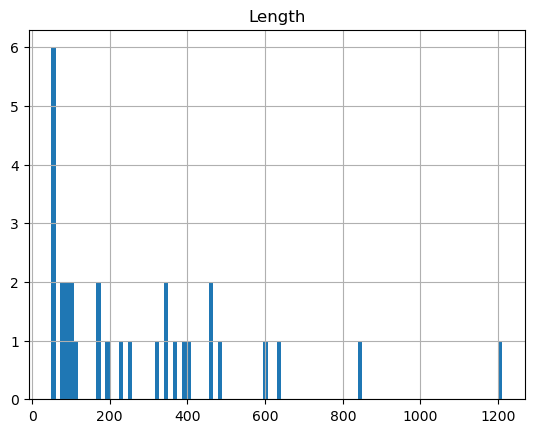

In [7]:
#df.hist()
df.hist('Length', bins=100)

# Part III: COSMIC ACTIONABILITY ANALYSIS 8pts.
### 1.	Parse the ACTIONABILITY file based on the following criteria:2 points
### $\;\;\;\;\;\;\;\;$ 1.	Each line has 'ErbB-1 OR EGFR OR FGFR1' AND 'lung/carcinoma/non small cell carcinoma'
### $\;\;\;\;\;\;\;\;$ 2.	Return only columns with the following headers:
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 1.	GENE
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 2.	MUTATION_REMARK
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 3.	DISEASE
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 4.	ACTIONABILITY_RANK
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 5.	DRUG_COMBINATION
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 6.	SOURCE
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ 7.	PRIMARY_OUTCOME
### 2.	Create a dataframe with parsed file in jupyter notebook. The dataframe must provide access to the full file. 2 points

In [8]:
#Parse Actionability Data file
data = pd.read_csv('/Users/Kaitlyn/Desktop/ActionabilityData.tsv', sep='\t', index_col=False, dtype='unicode') #read input file

#Parsing data within the dataframe based on search terms
#including "and logic" as per HW9 review comments
df = data[(data['GENE'].isin(['EGFR', 'FGFR1','ErbB-1'])) & (data['DISEASE'] == 'lung / carcinoma / non small cell carcinoma')]

#Include desired columns
df = df[['GENE', 'MUTATION_REMARK', 'DISEASE', 'ACTIONABILITY_RANK', 'DRUG_COMBINATION', 'SOURCE', 'PRIMARY_OUTCOME_MEASURE']]
df.to_csv("/Users/Kaitlyn/Desktop/DataOutput1.csv", sep='\t',encoding='utf-8') #write parsed data to csv output file

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3): #set parameters for dataframe to show all rows
    display(df) #display all rows of dataframe

,GENE,MUTATION_REMARK,DISEASE,ACTIONABILITY_RANK,DRUG_COMBINATION,SOURCE,PRIMARY_OUTCOME_MEASURE
28,EGFR,(EGFR_Exon19del or EGFR_L858R or EGFR_T790M) a...,lung / carcinoma / non small cell carcinoma,3,Osimertinib + Savolitinib,NCT05261399,Progression free survival
29,EGFR,(EGFR_Exon19del or EGFR_L858R) and CD274_unspe...,lung / carcinoma / non small cell carcinoma,3,Alflutinib,NCT05255406,Progression free survival
30,EGFR,(EGFR_Exon19del or EGFR_L858R) and CD274_unspe...,lung / carcinoma / non small cell carcinoma,3,Bevacizumab + Cisplatin + Pemetrexed + Tisleli...,NCT05394233,Progression free survival
31,EGFR,(EGFR_Exon19del or EGFR_L858R) and MET_unspeci...,lung / carcinoma / non small cell carcinoma,3,Erlotinib + Telisotuzumab vedotin,10.1200/JCO.2019.37.15_suppl.3011,Maximum tolerated dose/toxicity
32,EGFR,(EGFR_Exon19del or EGFR_L858R) and MET_unspeci...,lung / carcinoma / non small cell carcinoma,3,Capmatinib + Erlotinib,NCT02468661,Maximum tolerated dose/toxicity
33,EGFR,(EGFR_Exon19del or EGFR_L858R) and MET_unspeci...,lung / carcinoma / non small cell carcinoma,3,Capmatinib + Nazartinib,10.1016/j.annonc.2020.08.1598,Overall Response Rate
34,EGFR,(EGFR_Exon19del or EGFR_L858R) and TP53_unspec...,lung / carcinoma / non small cell carcinoma,3,Carboplatin + Osimertinib + Pemetrexed,NCT04695925,Progression free survival
35,FGFR1,(FGFR1_unspecified or FGFR2_unspecified or FGF...,lung / carcinoma / non small cell carcinoma,3,Pemigatinib + Sintilimab,NCT05004974,Overall Response Rate
3457,EGFR,EGFR_C797,lung / carcinoma / non small cell carcinoma,3,BLU-701,NCT05153408,Overall Response Rate
3458,EGFR,EGFR_C797,lung / carcinoma / non small cell carcinoma,3,WJ13404,NCT05662670,Overall Response Rate


### 3.	Create a scatterplot based on the GENE & MUTATION_REMARK.  2 points

<AxesSubplot:xlabel='GENE', ylabel='MUTATION_REMARK'>

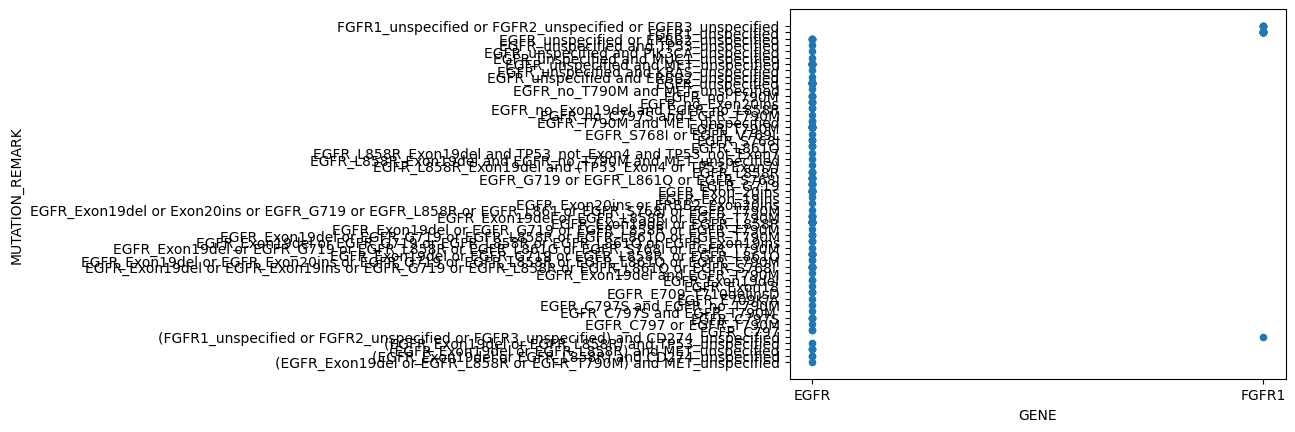

In [9]:
#Scatter plot for gene and Mutation remark
df.plot.scatter(x = 'GENE', y = 'MUTATION_REMARK') 
#prints scatter plot with MUTATION_REMARK on y axis and GENE on x axis for easier viewing of labels
#No hits for ErbB-1 search came up, only showing EGFR and FGFR1

### 4.	Create a scatterplot based on the ACTIONABILITY_RANK of '1' where the DRUG_COMBINATION and PRIMARY_OUTCOME are visualized. The plot includes only the following  PRIMARY_OUTCOME measures 2 points:
### $\;\;\;\;\;\;\;\;$ 1.	Progression free survival.
### $\;\;\;\;\;\;\;\;$ 2.	Disease free survival.
### $\;\;\;\;\;\;\;\;$ 3.	Overall survival.

In [10]:
#use original actionability file for re-parsing considering parameters above
data = pd.read_csv('/Users/Kaitlyn/Desktop/ActionabilityData.tsv', sep='\t', index_col=False, dtype='unicode') 

#include new parameters with old parameters when parsing
#Disease free survival never occurs alone. Had to include full outcome measure in parsing and plotting here.
#changed to use "and logic" here like in parsing for data above after recieving hw9 feedback.
df2 = data[(data['GENE'].isin(['ErbB-1','EGFR', 'FGFR1'])) & (data['DISEASE'] == 'lung / carcinoma / non small cell carcinoma')& data['ACTIONABILITY_RANK'].isin(['1']) & data['PRIMARY_OUTCOME_MEASURE'].isin(['Progression free survival','Disease free survival, relapse free survival, regression free survival, recurrence free survival', 'Overall survival'])]

#Include desired columns, limited here for easy reference
df2 = df2[['ACTIONABILITY_RANK', 'DRUG_COMBINATION', 'PRIMARY_OUTCOME_MEASURE']]
df2.to_csv("/Users/Kaitlyn/Desktop/DataOutput2.csv", sep='\t',encoding='utf-8')


with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.precision', 3): #set parameters for dataframe to show all rows
    display(df2) #display all rows of dataframe

,ACTIONABILITY_RANK,DRUG_COMBINATION,PRIMARY_OUTCOME_MEASURE
3505,1,Afatinib,Progression free survival
3506,1,Erlotinib + Ramucirumab,Progression free survival
3507,1,Osimertinib,"Disease free survival, relapse free survival, ..."
3508,1,Osimertinib,Progression free survival
3509,1,Dacomitinib,Progression free survival
3510,1,Gefitinib,Progression free survival
3513,1,Erlotinib,Progression free survival
3514,1,Erlotinib,Progression free survival
3524,1,Camrelizumab + Carboplatin + Pemetrexed,Progression free survival
3547,1,Alflutinib + Bevacizumab + Carboplatin + Pemet...,Progression free survival


<AxesSubplot:xlabel='PRIMARY_OUTCOME_MEASURE', ylabel='DRUG_COMBINATION'>

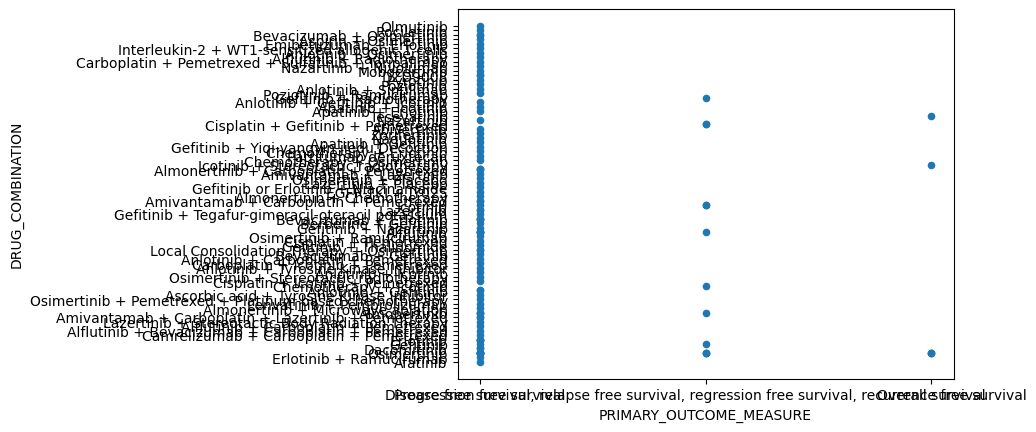

In [11]:
#Make the scatter plot of primary outcome vs drug combo, disease free survival includes other names, never occurs alone.
df2= pd.read_csv('/Users/Kaitlyn/Desktop/DataOutput2.csv', sep= '\t', engine= 'python')
df2.plot.scatter(x = 'PRIMARY_OUTCOME_MEASURE', y = 'DRUG_COMBINATION') 

# Part IV: Write up. 5 points
### •	Return as a jupyter notebook.
### •	Explain the reasoning behind each analysis. Why would you run an MSA on a group of proteins that are targets for non small cell carcinoma? Add it as markup to the jupyter notebook. 
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Answer: The MSA between these proteins that are targets for non small cell carcinoma is to identify any sequence similarity between genes or proteins that may contribute to this disease. If there are highly conserved regions between multiple sequences, this may suggest that a particular functional property is shared between these proteins which is relevant to the disease. This could be significant for understanding the disease's function and pathway. From this multiple sequence alignment, we can see that many of our proteins do not have sequence similarity (no matches denoted by only '-' or a zero in the right-most column). However, we do have several alignments between 24-50 amino acid residues conserved. For example, NP_001402802.1, NP_001402801.1, NP_001402800.1, and NP_006258.3 all have the same 34 amino acid residues conserved, which suggests similarity in function between these four proteins. While this is not the only alignment we see in our output, it is the first example of a conserved region between sequences and can give us a better understanding of the protein's association with the disease. 


### •	In your own words, what's the reasoning by running the uniprot analysis.
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Answer: The UniProt analysis was run so that we can see, along with our proteins of interest, a list of proteins associated with our POIs. These associated proteins include chimeric or fusion proteins with our POIs. Also included are feedback inhibitor proteins which may perform regulatory or inhibitory functions to the target genes and could be significant in understanding the disease pathway. Included in this list is their sequence lengths. Using the sequence lengths of the fasta seqs, we can observe a histogram comparing these lengths between search results. This comparison of sequence lengths can give us a look at the diversity in associated proteins, finding outliers in the group, and determining better characterization of the genes associated with the disease.



### •	What will the COSMIC ACTIONABILITY file analysis tell us? What's the purpose behind the analysis.
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Answer: It seems that the COSMIC Actionability file comes from the COSMIC database (Catalogue of Somatic Mutations in Cancer), which provides us information about our search terms including drug treatment, associated diseases, mutations, etc. The analysis we were able to run from this data set in our first scatter plot shows us the relationship between genes matching our search terms and their associated mutations. Then when we look at the second scatter plot, we see the effect of the drug treatments has on the mutated genes. As all of the results in this search are associated with the same disease, it can give us a better understanding of how certain mutated genes react to drug treatment, which can highlight areas of interest within the wild type sequences.  




### •	Provide a summary.
### $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Summary: In this assignment, we looked at the genes ErbB-1, EGFR, and FGFR1 in association with our disease of interest, lung/carcinoma/non small cell carcinoma. Through our initial search, we were able to find 580 relevant proteins and compared their sequences through a multiple sequence alignment. Through futher analysis of the conserved regions in our MSA, as discussed above, we can better understand the function of these regions in the sequence, and how these proteins are related to eachother and to the disease. Using the UniProt analysis, we are able to compare the sequence lengths using similar search parameters as part 1, and compared the lengths between the fasta sequences obtained. We then parsed through the provided Actionability file using a more narrow set of search parameters. This allowed us to look more directly at the theraputic relationship between drug treatment, gene mutation, and outcome of treatment related to the same disease. 



### •	References are easily obtained by running a pubmed search. Limit the return info to 20 references.
### •	Load them into the references as a dataframe.



In [12]:
from Bio import Entrez 
import pandas as pd
from io import StringIO

def Pubmed_search(query, retmax=20):  #function for esearch and efetch, query term set below.   
    Entrez.email = "knt2039@nyu.edu" #start Entrez session using biopython
    
    search = Entrez.esearch(db="pubmed", term=query, retmax=20) #use esearch, parameters set so searches pubmed database for search terms, maximum output of 20 IDs
    record = Entrez.read(search) #read the search 
    IDList = record['IdList'] #create ID list from search
    
    fetch = Entrez.efetch(db='pubmed', id=IDList, rettype='medline', retmode='text') #fetch based on IDList
    records = fetch.read() #read the fetch
    fetch.close()
    
    return records

query = "HUMAN[ORGN]ErbB-1" and "HUMAN[ORGN]EGFR" and "HUMAN[ORGN]FGFR1" #set search term

Pubmed = Pubmed_search(query, retmax=20) #rename function so it prints out all 20 sources
#print(References)


References = Pubmed.split('\n\n') #split at newlines
df = pd.DataFrame(References, columns=["PubMed Reference"])#printed out a dataframe filled with a bunch of '\n'

df["PubMed Reference"] = df["PubMed Reference"].str.replace('\n', ' ') #replace newlines with space
df 
#0-19 rows gives 20 PubMed sources

,PubMed Reference
0,PMID- 35870050 OWN - NLM STAT- MEDLINE DCOM- ...
1,PMID- 30201491 OWN - NLM STAT- MEDLINE DCOM- 2...
2,PMID- 30123084 OWN - NLM STAT- MEDLINE DCOM- 2...
3,PMID- 28630215 OWN - NLM STAT- MEDLINE DCOM- 2...
4,PMID- 23329143 OWN - NLM STAT- MEDLINE DCOM- 2...
5,PMID- 20422052 OWN - NLM STAT- MEDLINE DCOM- 2...
6,PMID- 18665077 OWN - NLM STAT- MEDLINE DCOM- 2...
7,PMID- 17363592 OWN - NLM STAT- MEDLINE DCOM- 2...
8,PMID- 17200012 OWN - NLM STAT- MEDLINE DCOM- 2...
9,PMID- 16452204 OWN - NLM STAT- MEDLINE DCOM- 2...
